In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { font-weight: bold !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
plt.style
plt.style.use("ggplot")

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

# 회귀(Regression)

- 모델 파라미터 
    - 기울기(가중치 weight, 계수 coefficient) : coef_
    - 절편(bias) : intercept_
    
    
- 여러개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 예를들면 아파트의 방 개수, 화장실 크기 등의 독립변수에 따라서 아파트 가격인 종속변수가 어떤 관계를 가지는지를 모델링하고 예측하는 것

    
```
선형 분석은 영국의 유전학자 Francis Galton이 유전의 법칙을 연구하다 나온 것에 기인하게 된다. 
연구의 내용은 부모와 자녀의 키 사이의 관계 였는데 연구결과로, 
아버지와 어머니의 키의 평균을 조사하여 표로 나타낸 결과 자녀의 키는 엄청 크거나 작은 것이 아닌 
그 세대의 평균으로 돌아가려는 경향이 있다는 것을 발견하였다.
Galton은 이를 회귀 분석(Regression Analysis) 라고 명칭하였다.
```

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/Regression_lineaire_avec_R.svg/500px-Regression_lineaire_avec_R.svg.png'>

# 회귀 알고리즘의 종류 

1. 선형 회귀(Linear regression)

머신러닝에서 가장 일반적인 회귀분석 유형이라고 할 수 있는 선형 회귀는 예측 변수와 종속 변수로 구성되며, 
이 둘은 선형 방식으로 서로 연관지어져 있다. 
선형 회귀는  가장 적합한 선, 즉 최적적합선을 사용한다.


2. 로지스틱 회귀(Logistic regression)

종속 변수에 이산 값이 있는 경우, 다시 말해 0 또는 1, 참 또는 거짓, 흑 또는 백, 
스팸 또는 스팸 아닌 것 등의 두 가지 값 중 하나만 취할 수 있는 경우 사용 
사실상 분류에 속한다. 


3. 리지 회귀(Ridge regression)

다중 회귀라고도 불리는 리지 회귀는 정규화 또는 규제화(regularization) 기법으로 알려져 있으며 
모델의 복잡성을 줄이는 데 사용된다. 
또한 ‘리지 회귀 페널티’로 알려진 약간의 편향, 즉 바이어스(bias)를 사용하여 
모델이 과대적합(overfitting)에 덜 취약하게 만든다.

4. 라쏘 회귀(Lasso regression)
라쏘 회귀는 리지 회귀와 같이 모델의 복잡성을 줄여주는 또 다른 정규화 기법이다. 
회귀 계수의 절대 사이즈를 금지함으로써 복잡성을 줄인다. 리지 회귀와는 다르게 아예 계수 값을 0에 가깝게 만든다.

5. 다항 회귀(Polynomial regression)

다항 회귀는 선형 모델을 사용하여 비선형 데이터 집합을 모델링한다. 
이것은 동그란 모양의 구멍에 네모난 모양의 못 또는 말뚝을 끼워 넣는 것과 같다. 
다항 회귀는 독립 변수가 여러 개인 선형 회귀를 뜻하는 다중 선형 회귀와 비슷한 방식으로 작동하지만, 
비선형 곡선을 사용한다. 즉, 데이터 포인트가 비선형 방식으로 존재할 때 사용한다.

# 농어의 길이와 무게

- 데이타준비  http://bit.ly/perch_data

In [3]:
from sklearn.model_selection import train_test_split

# from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [4]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     ).reshape(-1, 1)

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     ).reshape(-1, 1)

In [5]:
perch_df = pd.DataFrame(columns=['length','weight'])
perch_df['length'] = perch_length.flatten() 
perch_df['weight'] = perch_weight.flatten() 
perch_df.head(3)

,length,weight
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0


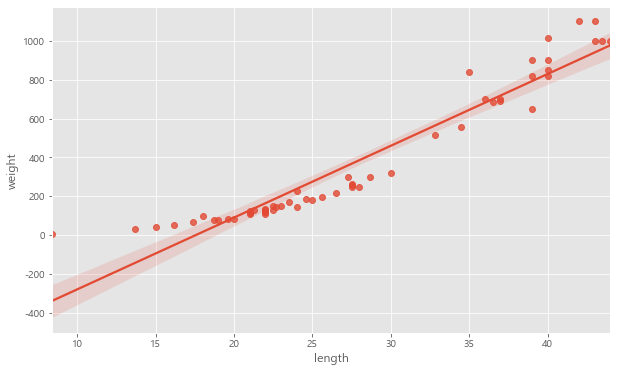

In [6]:
sns.regplot(x='length' , y='weight',data=perch_df);

In [7]:
perch_length.ndim, perch_weight.ndim, perch_length.shape, perch_weight.shape

(2, 2, (56, 1), (56, 1))

In [8]:
print(perch_length[:3])
print(perch_weight[:3])

[[ 8.4]
 [13.7]
 [15. ]]
[[ 5.9]
 [32. ]
 [40. ]]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)
X_train.shape, X_test.shape

((42, 1), (14, 1))

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

LinearRegression()

In [12]:
model_lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
# 기울기(가중치 weight, 계수 coefficient) : coef_
# 절편(bias) : intercept_
    
print('기울기 =>', model_lr.coef_, '절편 => ', model_lr.intercept_)

기울기 => [[39.01714496]] 절편 =>  [-709.01864495]


In [14]:
print(model_lr.predict([[50]]))

[[1241.83860323]]


In [15]:
print(model_lr.coef_, model_lr.intercept_)

[[39.01714496]] [-709.01864495]


In [16]:
model_lr.coef_[0,0]

39.0171449636302

In [17]:
X_train.min(), X_train.max()

(13.7, 44.0)

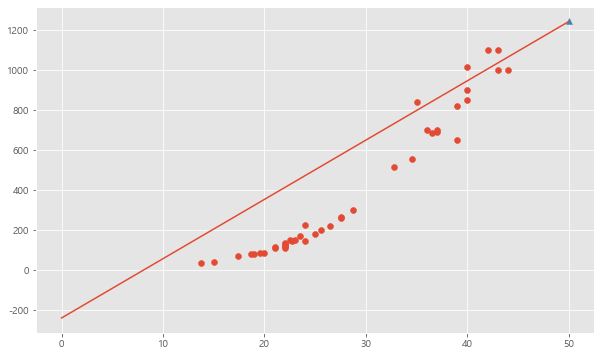

In [18]:
plt.scatter(X_train, y_train)

plt.plot([0, 50], [12*model_lr.coef_[0,0] + model_lr.intercept_ , 50*model_lr.coef_[0,0] + model_lr.intercept_ ])


plt.scatter(50, 1241.8, marker='^')
plt.show()


In [19]:
print( model_lr.score(X_train, y_train))
print( model_lr.score(X_test, y_test))

0.939846333997604
0.8247503123313558


# 선형회귀 평가지표 

- MAE, MSE, RMSE, MSLE, RMSLE
- R²

```
실제 값과 회귀 예측값의 차이를 기반으로 한다.  
MAE, MSE, RMSE, MSLE, RMSLE는 값이 작을수록 회귀 성능이 좋은 것이다. 
값이 작을수록 예측값과 실제값의 차이가 없다는 뜻
반면, R² 는 값이 클수록 성능이 좋다.
```

```
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

MAE =  mean_absolute_error(y_test, model.predict(X_test))

MSE = mean_squared_error(y_test, model.predict(X_test))

RMSE = np.sqrt(MSE)

MSLE = mean_squared_log_error(y_test, model.predict(X_test))

RMSLE = np.sqrt(mean_squared_log_error(y_test, model.predict(X_test)))

R2 = r2_score(y_test, model.predict(X_test))
```

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

MAE =  mean_absolute_error(y_test, model_lr.predict(X_test))
MSE =  mean_squared_error(y_test, model_lr.predict(X_test))
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, model_lr.predict(X_test))

print(f'MAE =  {MAE}')
print(f'MSE =  {MSE}')
print(f'RMSE =  {RMSE}')
print(f'R2 =  {R2}')

MAE =  94.46122937985581
MSE =  17590.265977889187
RMSE =  132.6283000640858
R2 =  0.8247503123313558


# 퀴즈 

보스턴 주택 가격데이타를 스케일링한 후 선형회귀 모델을 정의하고 테스트하여라 


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [65]:
from sklearn.datasets import load_boston

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
boston_df = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
boston_df['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',boston_df.shape)
boston_df.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [66]:
# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
boston_df['PRICE'] = boston.target

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'],axis=1, inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

In [68]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [69]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [70]:
#n모델 생성및 학습 
model_lr = LinearRegression()
model_lr.fit(X_train ,y_train )
y_preds = model_lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse) 

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('r2_score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
r2_score : 0.757


In [71]:
print('절편 값:', model_lr.intercept_)
print('회귀 계수값:', model_lr.coef_)

절편 값: 40.995595172164705
회귀 계수값: [-1.12979614e-01  6.55124002e-02  3.44366694e-02  3.04589777e+00
 -1.97958320e+01  3.35496880e+00  5.93713290e-03 -1.74185354e+00
  3.55884364e-01 -1.42954516e-02 -9.20180066e-01  1.03966156e-02
 -5.66182106e-01]


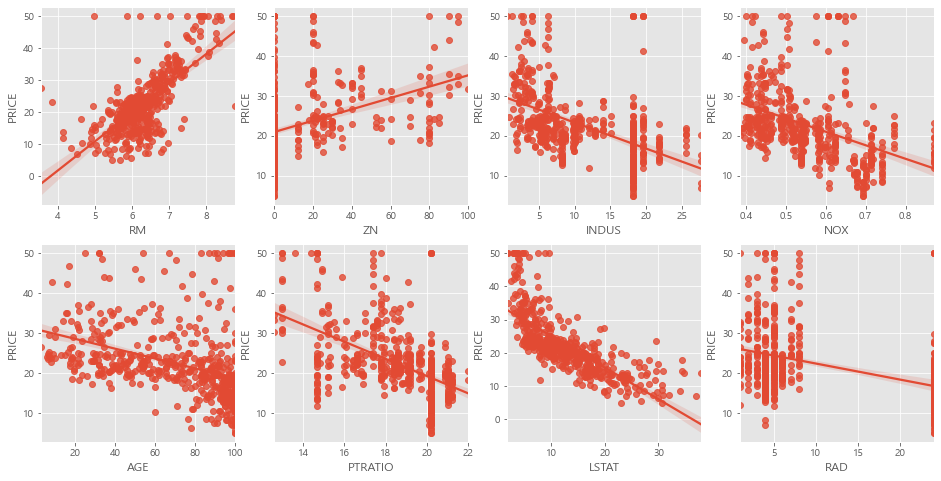

In [72]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # ax=axs[row][col] 서브플랏 
    sns.regplot(x=feature , y='PRICE',data=boston_df , ax=axs[row][col])

In [73]:
model_lr.coef_

array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
       -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
        3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
       -5.66182106e-01])

In [74]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
# 가장 큰값 컬럼까지 확인 
coeff = pd.Series(data=np.round(model_lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

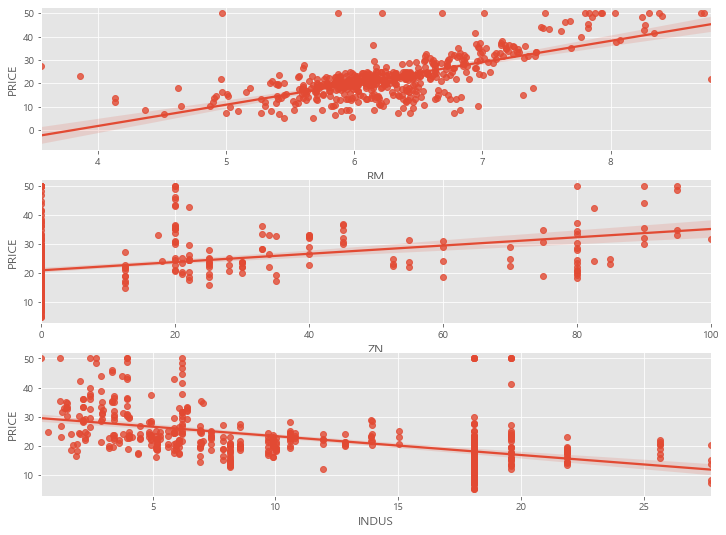

In [75]:
# 1개의 행과 3개의 열을 가진 subplots를 이용. axs는 1x3개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(12,9) , ncols=1 , nrows=3)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i , feature in enumerate(lm_features[:3]):
    #     
#     row = int(i/4)
#     col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # ax=axs[row][col] 서브플랏 
#     sns.regplot(x=feature , y='PRICE', data=boston_df , ax=axs[row][col])
    sns.regplot(x=feature , y='PRICE', data=boston_df , ax=axs[i])

In [76]:
sns.regplot(x='RM', y='PRICE', data=boston_df , ax=axs[0])
sns.regplot(x='ZN', y='PRICE', data=boston_df , ax=axs[1])
sns.regplot(x='INDUS', y='PRICE', data=boston_df , ax=axs[2])

<AxesSubplot:xlabel='INDUS', ylabel='PRICE'>

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

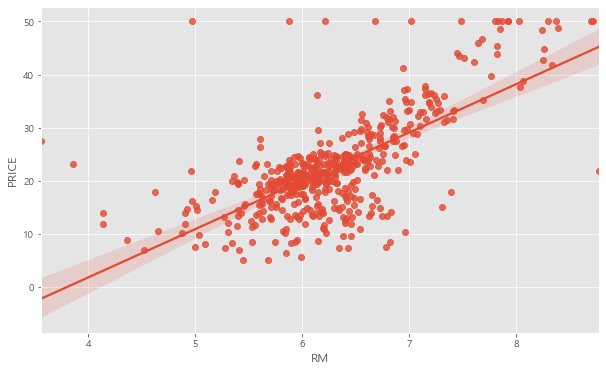

In [77]:
sns.regplot(x='RM' , y='PRICE', data=boston_df)

In [78]:
X_train.loc[49], y_train[49]

(CRIM         0.21977
 ZN           0.00000
 INDUS        6.91000
 CHAS         0.00000
 NOX          0.44800
 RM           5.60200
 AGE         62.00000
 DIS          6.08770
 RAD          3.00000
 TAX        233.00000
 PTRATIO     17.90000
 B          396.90000
 LSTAT       16.20000
 Name: 49, dtype: float64,
 19.4)

In [79]:
# 각피처의 기울기 
model_lr.coef_

array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
       -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
        3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
       -5.66182106e-01])

In [80]:
X_test.loc[210]

CRIM         0.17446
ZN           0.00000
INDUS       10.59000
CHAS         1.00000
NOX          0.48900
RM           5.96000
AGE         92.10000
DIS          3.87710
RAD          4.00000
TAX        277.00000
PTRATIO     18.60000
B          393.25000
LSTAT       17.27000
Name: 210, dtype: float64

In [81]:
X_test.loc[210].T

CRIM         0.17446
ZN           0.00000
INDUS       10.59000
CHAS         1.00000
NOX          0.48900
RM           5.96000
AGE         92.10000
DIS          3.87710
RAD          4.00000
TAX        277.00000
PTRATIO     18.60000
B          393.25000
LSTAT       17.27000
Name: 210, dtype: float64

In [83]:
# X_test.loc[210]의 주택가격 예측값
model_lr.predict([X_test.loc[210]])

array([23.15424087])

In [84]:
# (1개의 행에 해당되는 모든 피처값 * model_lr.coef_).sum()
(X_test.loc[210]*model_lr.coef_).sum() + model_lr.intercept_

23.1542408704776

# 퀴즈 

캘리포니아 주택 가격데이타를 스케일링한 후 선형회귀 모델을 정의하고 테스트하여라 
```
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 자치시(town)별 비소매 상업지역 토지 비율 |
| AveBedrms | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| Population | 10,000,000당  일산화질소 농도 |
| AveOccup | 주택 1가구당 평균 방의 수 |
| Latitude | 1940년 이전에 건축된 소유주택 비율 |
| Longitude | 5개의 보스턴 고용 센터까지의 가중 거리 |
```

In [86]:
# 설치 확인 
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block gro

In [87]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [88]:
# X 데이터 => california.data , 넘파이 
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [89]:
len(california.data), len(california.target)

(20640, 20640)

In [207]:
cali_df = pd.DataFrame(california.data, columns= california.feature_names)
y = california.target
X = cali_df

In [208]:
cali_df.describe

<bound method NDFrame.describe of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

     

In [209]:
cali_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [210]:
from sklearn.preprocessing import StandardScaler
stan_scaler = StandardScaler()
cali_scaled = stan_scaler.fit_transform(X)
cali_scaled = pd.DataFrame(cali_scaled, columns = X.columns)


In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [212]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [213]:
cali_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


In [214]:
## scaler를 안쓴 모델을 써보자.

lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [215]:
MSE_orginal = mean_squared_error(y_test, y_pred)
RMSE_original = np.sqrt(MSE_orginal)

In [216]:
MSE_orginal, RMSE_original

(0.5301855177612782, 0.7281383919017581)

In [217]:
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(MSE_orginal , RMSE_original))
print('r2_score : {0:.3f}'.format(r2_score(y_test, y_pred)))

MSE : 0.530 , RMSE : 0.728
r2_score : 0.598


In [218]:
X_train, X_test, y_train, y_test = train_test_split(cali_scaled, y)

In [219]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [220]:
MSE =  mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [221]:
MSE, RMSE

(0.5173065859531988, 0.7192402838782035)

In [222]:
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(MSE , RMSE))
print('r2_score : {0:.3f}'.format(r2_score(y_test, y_pred)))

MSE : 0.517 , RMSE : 0.719
r2_score : 0.598


In [223]:
print('절편 값:', model_lr.intercept_)
print('회귀 계수값:', model_lr.coef_)

절편 값: 40.995595172164705
회귀 계수값: [-1.12979614e-01  6.55124002e-02  3.44366694e-02  3.04589777e+00
 -1.97958320e+01  3.35496880e+00  5.93713290e-03 -1.74185354e+00
  3.55884364e-01 -1.42954516e-02 -9.20180066e-01  1.03966156e-02
 -5.66182106e-01]


In [224]:
lm_features = california.feature_names
list(enumerate(lm_features))

[(0, 'MedInc'),
 (1, 'HouseAge'),
 (2, 'AveRooms'),
 (3, 'AveBedrms'),
 (4, 'Population'),
 (5, 'AveOccup'),
 (6, 'Latitude'),
 (7, 'Longitude')]

In [228]:
cali_scaled['MedHouseVal'] = y

In [230]:
cali_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,0.781
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,0.771
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,0.923
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,0.847


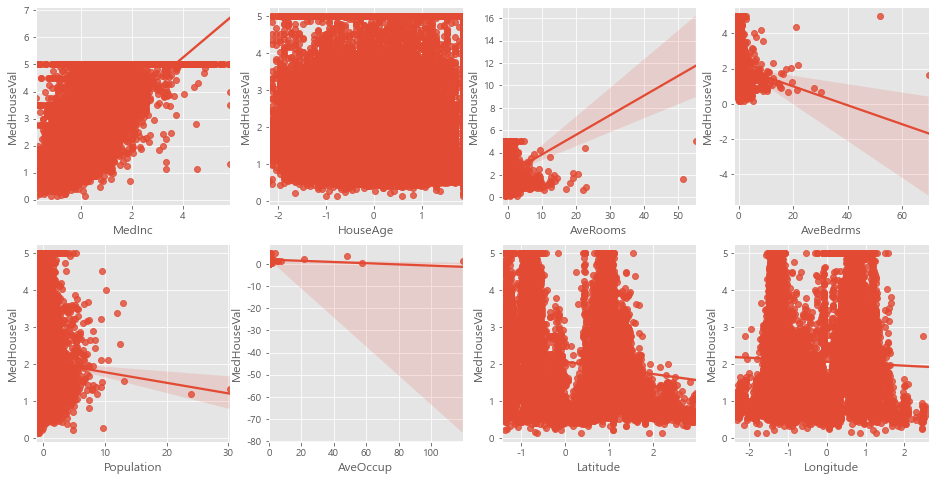

In [231]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 2x4개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['MedInc','HouseAge', 'AveRooms','AveBedrms','Population','AveOccup', 'Latitude',
 'Longitude']


for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # ax=axs[row][col] 서브플랏 
    sns.regplot(x=feature, y='MedHouseVal',data=cali_scaled , ax=axs[row][col])

In [234]:
coeff = pd.Series(data = np.round(lm.coef_, 1), index = X_train.columns)
coeff.sort_values(ascending=True)

Latitude     -0.9
Longitude    -0.9
AveRooms     -0.2
Population   -0.0
AveOccup     -0.0
HouseAge      0.1
AveBedrms     0.3
MedInc        0.8
dtype: float64

In [239]:
cali_scaled.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

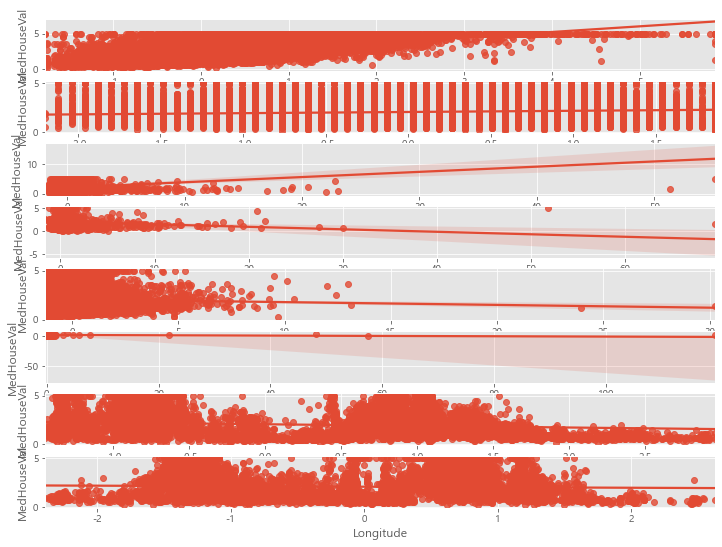

In [240]:
# 1개의 행과 3개의 열을 가진 subplots를 이용. axs는 1x3개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(12,9) , ncols=1 , nrows=8)

for i , feature in enumerate(X.columns):
    #     
#     row = int(i/4)
#     col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # ax=axs[row][col] 서브플랏 
#     sns.regplot(x=feature , y='PRICE', data=boston_df , ax=axs[row][col])
    sns.regplot(x=feature , y='MedHouseVal', data=cali_scaled , ax=axs[i])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Regrsssion model`s model validation

- MSE: 회귀모델의 기본적인 loss function. outlier에 큰 영향을 받는다.
$$
\frac{1}{n} \sum_{i=1}^{n}{(y_i = \hat{y_i})^2}
$$

- MAE: L1 normalization을 사용.

$$
\frac{1}{n} \sum_{i=1}^{n}{(\lvert y_i - \hat{y_i}\rvert})
$$

- LMSE: root를 사용

$$
\sqrt{\frac{1}{n} \sum_{i=1}^{n}{(\lvert y_i - \hat{y_i}\rvert})}
$$

In [243]:
MAE = mean_absolute_error(y_test, lm.predict(X_test))
MSE = mean_squared_error(y_test, lm.predict(X_test))
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, lm.predict(X_test))

In [244]:
print(f'MAE =  {MAE}')
print(f'MSE =  {MSE}')
print(f'RMSE =  {RMSE}')
print(f'R2 =  {R2}')

MAE =  0.528685961539408
MSE =  0.5173065859531988
RMSE =  0.7192402838782035
R2 =  0.5976254987913221


# 다항 회귀(Polynomial regression)

- 2차 방정식 
$$ ax^2 + bx + c $$

In [245]:
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)


일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [246]:
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )


poly = PolynomialFeatures(degree=3)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [247]:
X_train_poly = np.column_stack((X_train**2, X_train))
X_test_poly = np.column_stack((X_test**2, X_test))

In [248]:
 np.column_stack((X_train**2, X_train))

array([[ 1.66100284,  0.08362889,  1.07175322, ..., -0.01633856,
        -1.33988509,  1.30757496],
       [ 0.55533571,  1.17455174,  0.08854954, ..., -0.02043381,
        -1.2696571 ,  1.21274013],
       [ 0.00301582,  0.07129965,  0.05464078, ...,  0.14802376,
        -0.74997001,  0.82341817],
       ...,
       [ 0.03250798,  0.44130823,  0.03528031, ...,  0.03575162,
        -0.81083426,  0.73856595],
       [ 1.33887863,  0.58665653,  0.27728646, ..., -0.01227381,
        -0.94660837,  0.94320954],
       [ 0.58635352,  0.1358989 ,  0.52181335, ...,  0.02832808,
        -0.90447158,  0.8433834 ]])

In [249]:
print(X_train_poly.shape, X_test_poly.shape)

(15480, 16) (5160, 16)


In [252]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']


## 농어의 길이와 무게

- 데이타준비  http://bit.ly/perch_data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [253]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     ).reshape(-1, 1)

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     ).reshape(-1, 1)

In [254]:
perch_length.ndim, perch_weight.ndim, perch_length.shape, perch_weight.shape

(2, 2, (56, 1), (56, 1))

In [255]:
print(perch_length[:3])
print()
print(perch_weight[:3])

[[ 8.4]
 [13.7]
 [15. ]]

[[ 5.9]
 [32. ]
 [40. ]]


In [256]:
#학습, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)
X_train.shape, X_test.shape

((42, 1), (14, 1))

In [257]:
#2차식 X_train**2 새로운 컬럼으로 생성해서 추가
#np.column_stack((넘파이배열1, 넘파이배열2))
X_train_poly = np.column_stack((X_train**2, X_train))
X_test_poly = np.column_stack((X_test**2, X_test))

In [258]:
print(X_train_poly.shape, X_test_poly.shape)

(42, 2) (14, 2)


In [259]:
#길이*길이, 길이
X_train_poly[:3]

array([[384.16,  19.6 ],
       [484.  ,  22.  ],
       [349.69,  18.7 ]])

In [260]:
#길이*길이, 길이
X_test_poly[:3]

array([[ 70.56,   8.4 ],
       [324.  ,  18.  ],
       [756.25,  27.5 ]])

In [261]:
#모델 생성
model_lr = LinearRegression()
model_lr.fit(X_train_poly, y_train)

#길이가 50인 농어의 무게는?
print(model_lr.predict([[50**2, 50]]))

[[1573.98423528]]


In [262]:
print(model_lr.coef_, model_lr.intercept_)

[[  1.01433211 -21.55792498]] [116.05021078]


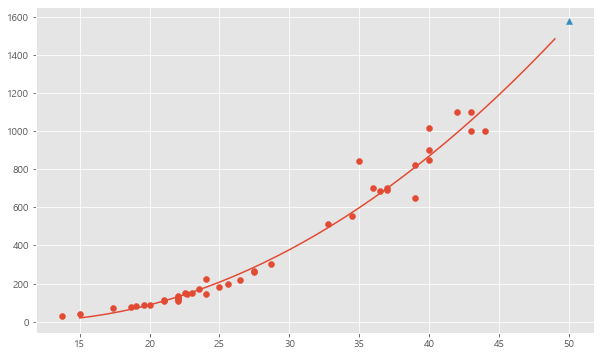

In [263]:
#시각화
point = np.arange(15, 50)

#학습데이터 전체
plt.scatter(X_train, y_train)

#회귀식
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

#길이 50일 때 농어의 무게 -> 1574
plt.scatter([50], [1574], marker='^')
plt.show()

In [264]:
print(model_lr.score(X_train_poly, y_train))
print(model_lr.score(X_test_poly, y_test))

0.9706807451768623
0.9775935108325122


# 특성 공학

- 특성공학(Feature Engineering) 이란?
    - 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업 
    - 농어의 길이, 농어의 높이 => 농어의 길이 * 농어의 높이 

In [265]:
#length, height, width
df = pd.read_csv('https://bit.ly/perch_csv')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [266]:
#데이터프레임 -> 2차원 넘파이 배열
perch_full = df.to_numpy()
print(perch_full[:5])

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


In [267]:
#농어의 무게 y
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [268]:
#학습, 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_full, perch_weight, random_state=42)

In [269]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


#모델 생성 및 학습 
model_lr = LinearRegression()
model_lr.fit(X_train ,y_train )

mse = mean_squared_error(y_test, model_lr.predict(X_test))
rmse = np.sqrt(mse) 

print(model_lr.score(X_train, y_train))
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('r2_score : {0:.3f}'.format(r2_score(y_test, model_lr.predict(X_test))))

0.9559326821885706
MSE : 12080.653 , RMSE : 109.912
r2_score : 0.880


In [270]:
print('절편 값:', model_lr.intercept_)
print('회귀 계수값 기울기:', model_lr.coef_)

절편 값: -599.1708082981097
회귀 계수값 기울기: [ 9.07538153 69.46401443 38.00385678]


In [274]:
#기존 데이터프레임에 y weight 컬럼 추가
df['weight'] = perch_weight
df.head()

,length,height,width,weight
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


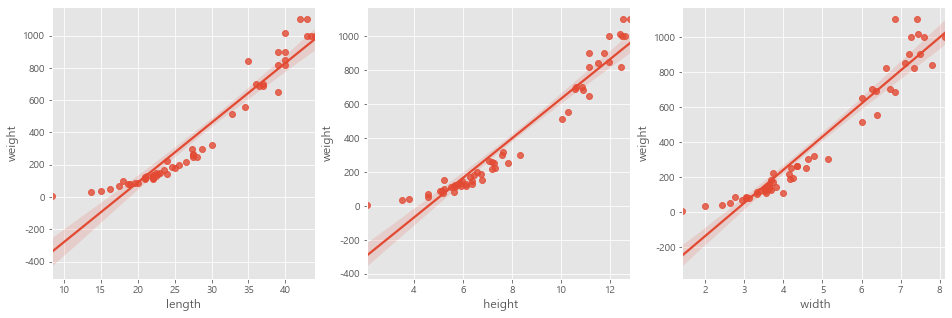

In [276]:
# 1개의 행과 3개의 열을 가진 subplots를 이용. axs는 1x3개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,5) , ncols=3 , nrows=1)
lm_features = list(df.columns)

# sns.regplot(x='length' , y='weight', data=df , ax=axs[0])
# sns.regplot(x=' height' , y='weight', data=df , ax=axs[1])
# sns.regplot(x=' width' , y='weight', data=df , ax=axs[2])

for i , feature in enumerate(lm_features[:3]):
    sns.regplot(x=feature , y='weight', data=df , ax=axs[i])

## PolynomialFeatures 활용 

In [277]:
from sklearn.preprocessing import PolynomialFeatures

In [278]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [279]:
#include_bias = False -> 첫번째로 생성되는 절편 제외
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [280]:
#학습용, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(perch_full, perch_weight, random_state=42)

#객체 생성
#degree 기본값 2
poly = PolynomialFeatures(include_bias=False)

#학습용 데이터 X에 PolynomialFeatures 적용
poly.fit(X_train)

#별도 변수로 저장
X_train_poly = poly.transform(X_train)

In [281]:
print(X_train.shape, X_train_poly.shape)

(42, 3) (42, 9)


In [282]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [283]:
#테스트용 데이터 X에 PolynomialFeatures 적용
X_test_poly = poly.transform(X_test)

In [284]:
X_test_poly.shape

(14, 9)

In [285]:
#선형 모델 생성 후 학습
model_lr = LinearRegression()
model_lr.fit(X_train_poly, y_train)

print(model_lr.score(X_train_poly, y_train))
print(model_lr.score(X_test_poly, y_test))

0.9903183436982124
0.9714559911594203


In [286]:
# degree=5
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(X_train)
X_train_poly2 = poly.transform(X_train)
X_test_poly2 = poly.transform(X_test)

In [287]:
print(poly.get_feature_names())

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2', 'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1', 'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3', 'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2', 'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2', 'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3', 'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4', 'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5', 'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5']


In [288]:
X_train_poly2[:2]

array([[1.96000000e+01, 5.14000000e+00, 3.04000000e+00, 3.84160000e+02,
        1.00744000e+02, 5.95840000e+01, 2.64196000e+01, 1.56256000e+01,
        9.24160000e+00, 7.52953600e+03, 1.97458240e+03, 1.16784640e+03,
        5.17824160e+02, 3.06261760e+02, 1.81135360e+02, 1.35796744e+02,
        8.03155840e+01, 4.75018240e+01, 2.80944640e+01, 1.47578906e+05,
        3.87018150e+04, 2.28897894e+04, 1.01493535e+04, 6.00273050e+03,
        3.55025306e+03, 2.66161618e+03, 1.57418545e+03, 9.31035750e+02,
        5.50651494e+02, 6.97995264e+02, 4.12822102e+02, 2.44159375e+02,
        1.44405545e+02, 8.54071706e+01, 2.89254655e+06, 7.58555575e+05,
        4.48639873e+05, 1.98927329e+05, 1.17653518e+05, 6.95849599e+04,
        5.21676772e+04, 3.08540347e+04, 1.82483007e+04, 1.07927693e+04,
        1.36807072e+04, 8.09131319e+03, 4.78552376e+03, 2.83034868e+03,
        1.67398054e+03, 3.58769566e+03, 2.12190560e+03, 1.25497919e+03,
        7.42244501e+02, 4.38992857e+02, 2.59637799e+02],
       

In [289]:
print(X_train_poly2.shape)

(42, 55)


In [290]:
model_lr = LinearRegression()
model_lr.fit(X_train_poly2, y_train)
print(model_lr.score(X_train_poly2, y_train))
print(model_lr.score(X_test_poly2, y_test))

0.999999999997515
-144.40196592191958


# 퀴즈 

- 1) 보스턴 주택 가격데이타를 스케일링한 후 선형회귀 모델을 정의하고 테스트하여라(ML4_01)
- 2) 보스턴 주택 가격데이타를  PolynomialFeatures 를 이용해서 데이타를 변형하고 
   선형회귀 모델을 정의하고 테스트하여라 
- 1)의 모델과 비교 

===========================================================================

* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [291]:
from sklearn.datasets import load_boston

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
boston_df = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
boston_df['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',boston_df.shape)
boston_df.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [292]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'],axis=1, inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

In [293]:
# 모델 생성및 학습 
model_lr = LinearRegression()
model_lr.fit(X_train ,y_train )
y_preds = model_lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse) 

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('r2_score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
r2_score : 0.757


In [294]:
print('절편 값:', model_lr.intercept_)
print('회귀 계수값:', model_lr.coef_)

절편 값: 40.995595172164705
회귀 계수값: [-1.12979614e-01  6.55124002e-02  3.44366694e-02  3.04589777e+00
 -1.97958320e+01  3.35496880e+00  5.93713290e-03 -1.74185354e+00
  3.55884364e-01 -1.42954516e-02 -9.20180066e-01  1.03966156e-02
 -5.66182106e-01]


In [295]:
# 각피처의 기울기 
model_lr.coef_

array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
       -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
        3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
       -5.66182106e-01])

In [296]:
# 절편
model_lr.intercept_

40.995595172164705

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

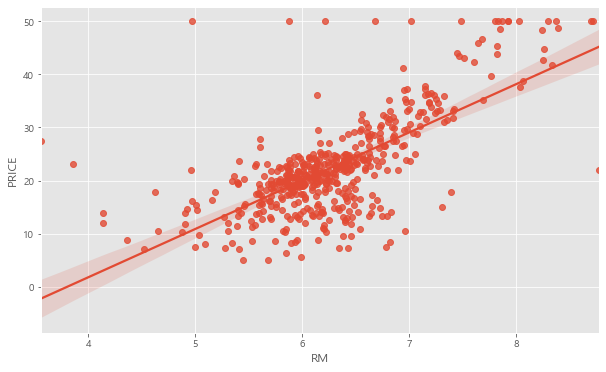

In [297]:
sns.regplot(x='RM' , y='PRICE', data=boston_df)

## Polynominal Feature 활용

In [299]:
from sklearn.preprocessing import PolynomialFeatures

In [300]:
# 학습용과 테스트용으로 분리
X_train , X_test , y_train , y_test = train_test_split( X_data , y_target , \
                                                       test_size=0.3, random_state=156)

# 객체 생성 
poly = PolynomialFeatures(include_bias=False, degree=3)
# poly = PolynomialFeatures(include_bias=False)

# 학습용데이타 X 에 PolynomialFeatures 적용 
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [301]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((354, 13), (354,), (152, 13), (152,))

In [302]:
print(poly.get_feature_names())

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0^2 x3', 'x0^2 x4', 'x0^2 x5', 'x0^2 x6',

In [303]:
# 선형 모델 생성 후 학습 
model_lr = LinearRegression()
model_lr.fit(X_train_poly, y_train)

print(model_lr.score(X_train_poly, y_train))
print(model_lr.score(X_test_poly, y_test))

1.0
-1116.5979037096138


In [304]:
mse = mean_squared_error(y_test, model_lr.predict(X_test_poly))
rmse = np.sqrt(mse) 

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('r2_score : {0:.3f}'.format(r2_score(y_test,  model_lr.predict(X_test_poly))))

MSE : 79625.592 , RMSE : 282.180
r2_score : -1116.598
